In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [4]:
Engl=pd.read_csv("C:\\Users\\RAJNEESH\\Downloads\\Compressed\\Python-master\\TV\\English shows - English shows .csv")
Engl

,Show,Genre
0,Game of thrones,"Action, Drama, Adventure, Fantasy, Politics, E..."
1,Sherlock,"Sci-fi, Thriller, English"
2,F.r.i.e.n.d.s.,"Comedy, Romance, Drama, English"
3,The walking dead,"Horror, Action, Thriller, Drama, Adventure, Po..."
4,House of cards,"Drama, Politics, English"
5,Suits,"Comedy, Drama, English"
6,Stranger things,"Sci-fi, Drama, Fantasy, English"
7,Vikings,"Action, Drama, Adventure, History, English"
8,The big bang theory,"Comedy, Drama, English"
9,The crown,"Drama, Politics, History, English"


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(Engl['Genre'])

In [6]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [7]:
# Build a 1-dimensional array with tv shows titles
titles = Engl['Show']
indices = pd.Series(Engl.index, index=Engl['Show'])

# Function that get show recommendations based on the cosine similarity score of movie genres
def genre_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [8]:
def f(s):
    if s=="Male":
        return 0
    elif s=="Female":
        return 1
    else:
        return -1
Resp=pd.read_csv("C:\\Users\\RAJNEESH\\Downloads\\Compressed\\Python-master\\TV\\Responses.csv")
Resp["Sex"]=Resp.Gender.apply(f)
Resp=Resp.drop("Gender",axis=1)

In [9]:
def d(s):
    if s=="24-26":
        return 25
    elif s=="21-23":
        return 22
    elif s=="27-29":
        return 28
    elif s=="Greater than 29":
        return 30
    elif s=="Less than 21":
        return 20
    else:
        return -1
    
    

Resp["age"]=Resp.Age.apply(d)
Resp=Resp.drop('Age',axis=1)

In [10]:
def t(s):
    if s=="Engineering":
        return 0
    elif s=="Commerce":
        return 1
    elif s=="Arts":
        return 2
    elif s=="Medical":
        return 3
    elif s=="Law":
        return 4
    else:
        return -1
def x(s):
    if s=="Recently committed(less than an year)":
        return 0
    elif s=="Committed for more than 1 but less than 2 years":
        return 1
    elif s=="Committed for more than 2 years(or married/engaged)":
        return 2
    elif s=="Recently broken-up(less than an year)":
        return 3
    elif s=="Single":
        return 4
    else:
        return -1

Resp["Education"]=Resp["What is your education background?"].apply(t)
Resp["Relationship"]=Resp["What is your relationship status?"].apply(x)
Resp

,What is your education background?,What is your relationship status?,What platform do you use for watching TV-shows ?,Game of thrones,Sherlock,F.r.i.e.n.d.s.,The walking dead,House of cards,Suits,Stranger things,...,Fear Factor,Khatron ke khiladi,C.I.D.,Gumrah,Crime Patrol,MTV Roadies,Sex,age,Education,Relationship
0,Engineering,Committed for more than 2 years(or married/eng...,Downloaded from some source,5,4,5,3,4,4,3,...,2,1,1,1,1,1,0,25,0,2
1,Commerce,Committed for more than 1 but less than 2 years,"Youtube(or other free sites like Fmovies, Sola...",5,0,5,0,0,5,0,...,0,0,4,4,3,4,0,22,1,1
2,Engineering,Recently committed(less than an year),"Netflix, Youtube(or other free sites like Fmov...",5,4,5,0,0,5,0,...,0,0,0,0,0,2,1,25,0,0
3,Engineering,Single,"Netflix, Youtube(or other free sites like Fmov...",5,5,1,0,5,4,0,...,0,0,0,0,0,0,0,22,0,4
4,Engineering,Single,"Netflix, Youtube(or other free sites like Fmov...",0,4,3,0,0,0,0,...,3,2,4,4,2,3,0,25,0,4
5,Engineering,Single,"Youtube(or other free sites like Fmovies, Sola...",5,5,1,1,1,0,0,...,0,5,5,5,5,5,0,25,0,4
6,Engineering,Recently committed(less than an year),"Netflix, Youtube(or other free sites like Fmov...",4,5,5,0,0,2,0,...,0,2,4,1,2,3,0,25,0,0
7,Engineering,Single,"Youtube(or other free sites like Fmovies, Sola...",2,5,2,4,2,2,2,...,3,1,5,0,1,0,0,22,0,4
8,Engineering,Single,"Youtube(or other free sites like Fmovies, Sola...",4,4,5,2,2,3,2,...,2,0,2,0,0,0,0,25,0,4
9,Engineering,Committed for more than 2 years(or married/eng...,"Netflix, Youtube(or other free sites like Fmov...",5,4,5,3,4,0,0,...,3,4,4,0,3,3,0,22,0,2


In [11]:
Resp=Resp.drop('What is your education background?', axis=1)
Resp=Resp.drop('What is your relationship status?', axis=1)
Resp=Resp.drop('What platform do you use for watching TV-shows ?', axis=1)

Resp


,Game of thrones,Sherlock,F.r.i.e.n.d.s.,The walking dead,House of cards,Suits,Stranger things,Vikings,The big bang theory,The crown,...,Fear Factor,Khatron ke khiladi,C.I.D.,Gumrah,Crime Patrol,MTV Roadies,Sex,age,Education,Relationship
0,5,4,5,3,4,4,3,3,4,0,...,2,1,1,1,1,1,0,25,0,2
1,5,0,5,0,0,5,0,0,0,0,...,0,0,4,4,3,4,0,22,1,1
2,5,4,5,0,0,5,0,0,5,0,...,0,0,0,0,0,2,1,25,0,0
3,5,5,1,0,5,4,0,3,1,4,...,0,0,0,0,0,0,0,22,0,4
4,0,4,3,0,0,0,0,0,0,0,...,3,2,4,4,2,3,0,25,0,4
5,5,5,1,1,1,0,0,0,0,0,...,0,5,5,5,5,5,0,25,0,4
6,4,5,5,0,0,2,0,0,4,0,...,0,2,4,1,2,3,0,25,0,0
7,2,5,2,4,2,2,2,2,2,2,...,3,1,5,0,1,0,0,22,0,4
8,4,4,5,2,2,3,2,2,4,2,...,2,0,2,0,0,0,0,25,0,4
9,5,4,5,3,4,0,0,0,0,0,...,3,4,4,0,3,3,0,22,0,2


In [12]:
Resp=Resp.drop('Do you see other language shows?', axis=1)
Resp=Resp.drop('How many hours of a week do you spend on watching TV series? [Week days]', axis=1)
Resp=Resp.drop('How many hours of a week do you spend on watching TV series? [Weekends]', axis=1)

In [13]:
Resp

,Game of thrones,Sherlock,F.r.i.e.n.d.s.,The walking dead,House of cards,Suits,Stranger things,Vikings,The big bang theory,The crown,...,Fear Factor,Khatron ke khiladi,C.I.D.,Gumrah,Crime Patrol,MTV Roadies,Sex,age,Education,Relationship
0,5,4,5,3,4,4,3,3,4,0,...,2,1,1,1,1,1,0,25,0,2
1,5,0,5,0,0,5,0,0,0,0,...,0,0,4,4,3,4,0,22,1,1
2,5,4,5,0,0,5,0,0,5,0,...,0,0,0,0,0,2,1,25,0,0
3,5,5,1,0,5,4,0,3,1,4,...,0,0,0,0,0,0,0,22,0,4
4,0,4,3,0,0,0,0,0,0,0,...,3,2,4,4,2,3,0,25,0,4
5,5,5,1,1,1,0,0,0,0,0,...,0,5,5,5,5,5,0,25,0,4
6,4,5,5,0,0,2,0,0,4,0,...,0,2,4,1,2,3,0,25,0,0
7,2,5,2,4,2,2,2,2,2,2,...,3,1,5,0,1,0,0,22,0,4
8,4,4,5,2,2,3,2,2,4,2,...,2,0,2,0,0,0,0,25,0,4
9,5,4,5,3,4,0,0,0,0,0,...,3,4,4,0,3,3,0,22,0,2


In [14]:
from sklearn import model_selection

Resp.to_csv('rep.csv', sep=',')


In [15]:
##delete the column names in the csv fil manualy as numpy only reads numerical values
rep=np.loadtxt('C:\\Users\\RAJNEESH\\Downloads\\Compressed\\Python-master\\TV\\rep.csv',delimiter=",")
rep.shape

(99, 37)

In [16]:
## for GOT 
Y1=rep[:,1]
X1=rep[:,2:37]
X1_train,X1_test,Y1_train,Y1_test=model_selection.train_test_split(X1,Y1)
svclassifier = SVC(kernel='linear', degree=8)  
svclassifier.fit(X1_train, Y1_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=8, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [17]:
## for GOT
y_pred = svclassifier.predict(X1_test) 

In [18]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(Y1_test, y_pred))  
print(classification_report(Y1_test, y_pred))  

[[1 3 1 1 0 0]
 [0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 1 1 0 0]
 [1 0 0 0 1 0]
 [2 0 1 2 1 7]]
              precision    recall  f1-score   support

         0.0       0.17      0.17      0.17         6
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         1
         3.0       0.25      0.33      0.29         3
         4.0       0.50      0.50      0.50         2
         5.0       1.00      0.54      0.70        13

   micro avg       0.40      0.40      0.40        25
   macro avg       0.32      0.26      0.28        25
weighted avg       0.63      0.40      0.48        25



C:\Users\RAJNEESH\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [42]:
df = Resp

In [43]:
df = df.drop('Sex', axis=1)

In [44]:
df = df.drop('age', axis=1)
df = df.drop('Education', axis=1)
df = df.drop('Relationship', axis=1)

In [45]:
df

,Game of thrones,Sherlock,F.r.i.e.n.d.s.,The walking dead,House of cards,Suits,Stranger things,Vikings,The big bang theory,The crown,...,Mahabharat,Coffee with Karan,Yeh Rishta Kya Kehlata Hai,Taarak Mehta Ka Ooltah Chashmah,Fear Factor,Khatron ke khiladi,C.I.D.,Gumrah,Crime Patrol,MTV Roadies
0,5,4,5,3,4,4,3,3,4,0,...,4,2,1,1,2,1,1,1,1,1
1,5,0,5,0,0,5,0,0,0,0,...,0,0,0,4,0,0,4,4,3,4
2,5,4,5,0,0,5,0,0,5,0,...,3,3,0,0,0,0,0,0,0,2
3,5,5,1,0,5,4,0,3,1,4,...,4,0,0,0,0,0,0,0,0,0
4,0,4,3,0,0,0,0,0,0,0,...,2,2,0,4,3,2,4,4,2,3
5,5,5,1,1,1,0,0,0,0,0,...,5,5,5,5,0,5,5,5,5,5
6,4,5,5,0,0,2,0,0,4,0,...,3,1,1,5,0,2,4,1,2,3
7,2,5,2,4,2,2,2,2,2,2,...,5,1,2,3,3,1,5,0,1,0
8,4,4,5,2,2,3,2,2,4,2,...,1,3,0,1,2,0,2,0,0,0
9,5,4,5,3,4,0,0,0,0,0,...,0,4,0,3,3,4,4,0,3,3


In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)

C:\Users\RAJNEESH\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [47]:
scaled_data = scaler.transform(df)

C:\Users\RAJNEESH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [48]:
from sklearn.decomposition import PCA

In [49]:
pca = PCA(n_components=2)

In [50]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [51]:
x_pca = pca.transform(scaled_data)
scaled_data.shape

(99, 32)

In [52]:
x_pca.shape

(99, 2)

Text(0, 0.5, 'Second Principal Component')

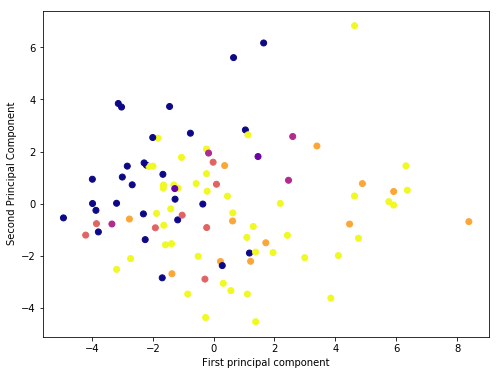

In [53]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],
            c=df['Game of thrones'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Second Principal Component')

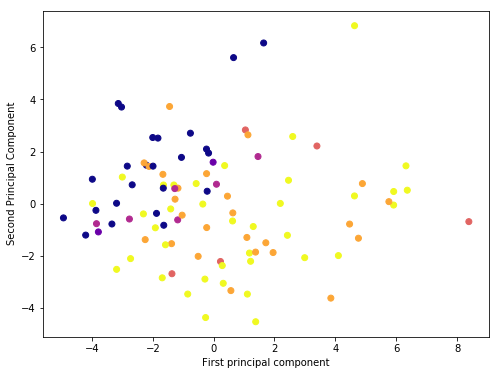

In [55]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],
            c=df['Sherlock'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Second Principal Component')

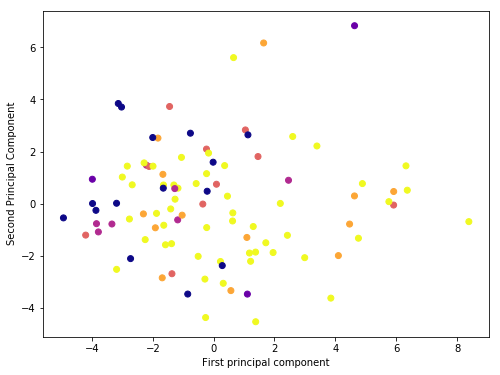

In [56]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],
            c=df['F.r.i.e.n.d.s.'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Second Principal Component')

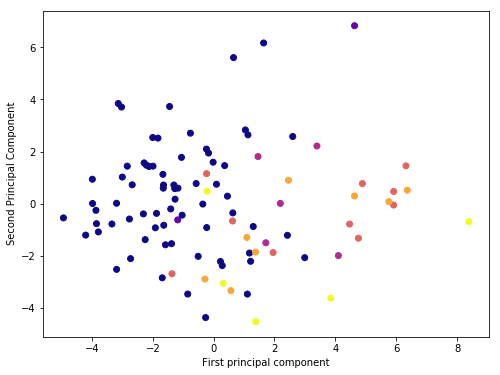

In [57]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],
            c=df['The walking dead'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')


Text(0, 0.5, 'Second Principal Component')

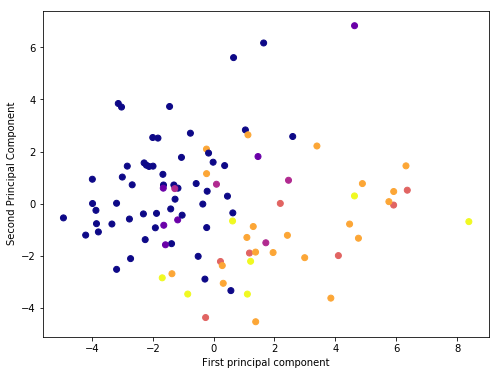

In [58]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],
            c=df['House of cards'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Second Principal Component')

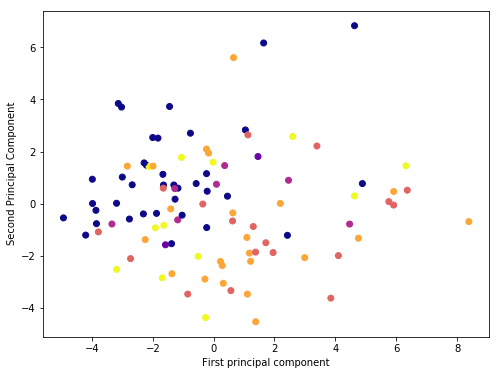

In [59]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],
            c=df['Suits'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Second Principal Component')

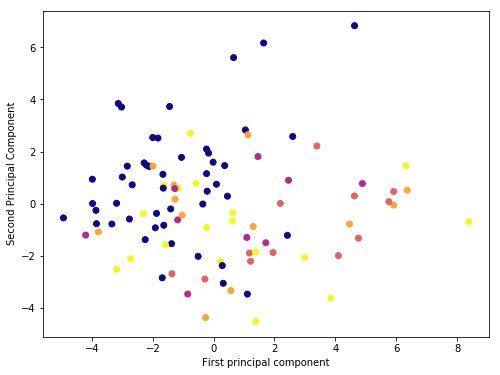

In [60]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],
            c=df['Stranger things'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Second Principal Component')

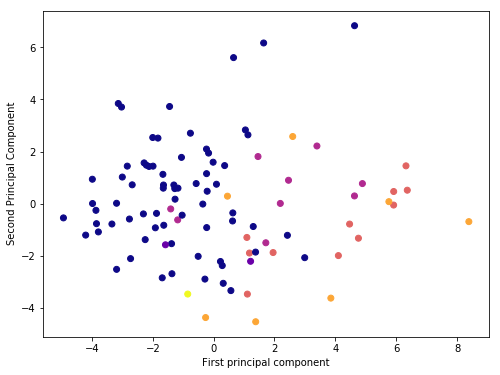

In [61]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],
            c=df['Vikings'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Second Principal Component')

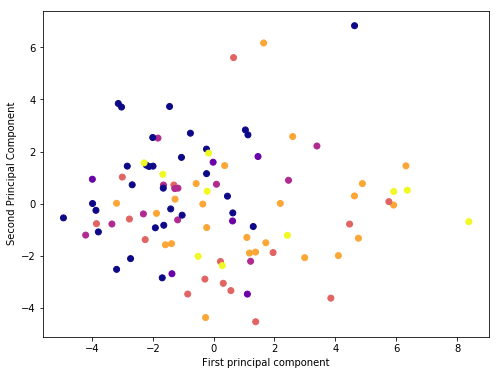

In [62]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],
            c=df['The big bang theory'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Second Principal Component')

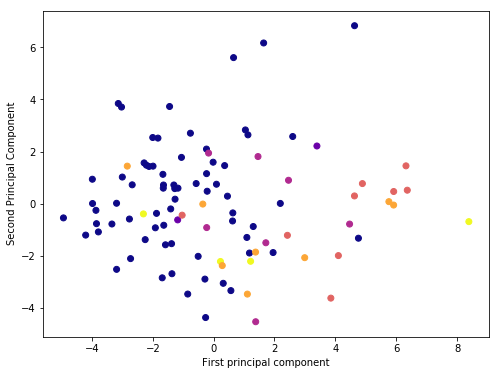

In [63]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],
            c=df['The crown'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Second Principal Component')

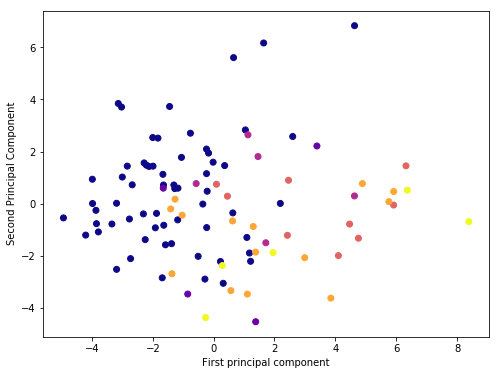

In [64]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],
            c=df['Daredevil'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Second Principal Component')

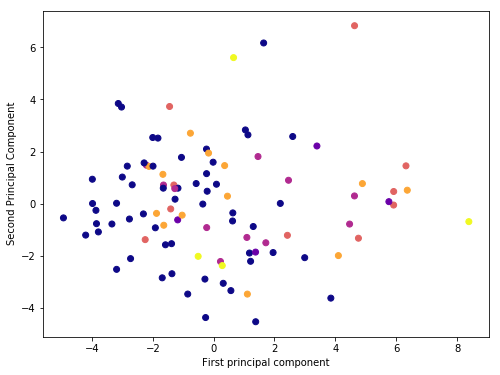

In [65]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],
            c=df['The vampire diaries'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Second Principal Component')

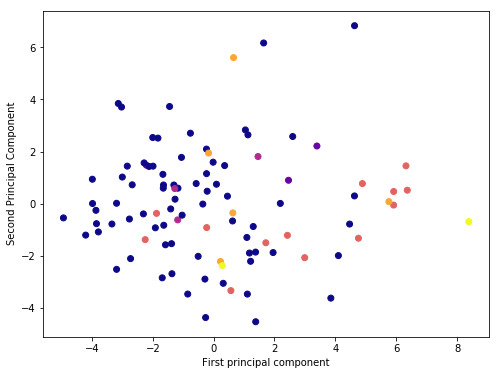

In [66]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],
            c=df['Gossip girl'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')


Text(0, 0.5, 'Second Principal Component')

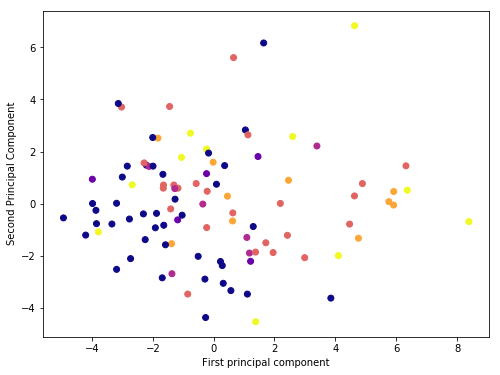

In [67]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],
            c=df['Man vs Wild'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Second Principal Component')

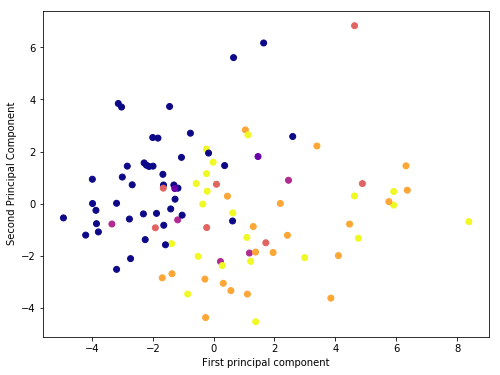

In [68]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],
            c=df['Narcos'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Second Principal Component')

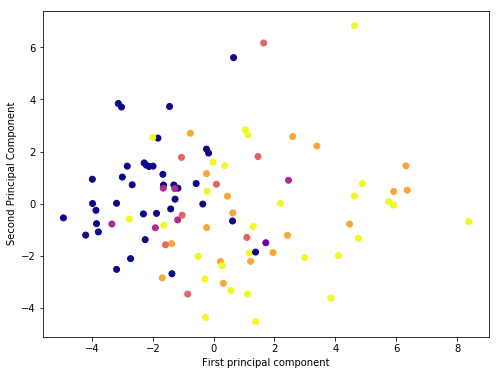

In [69]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],
            c=df['Sacred Games'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Second Principal Component')

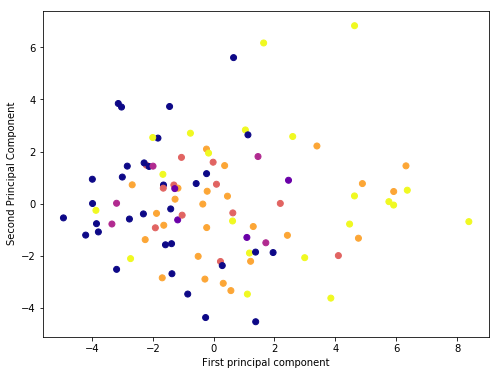

In [70]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],
            c=df['Permanent Roommates'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Second Principal Component')

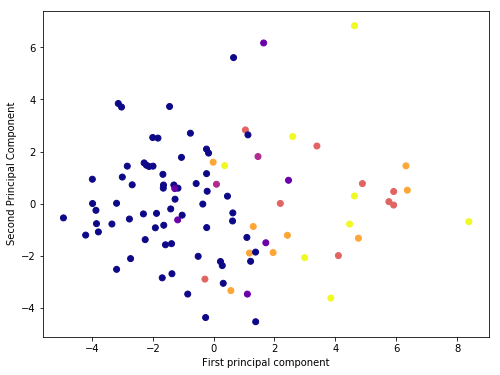

In [71]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],
            c=df['Breathe'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Second Principal Component')

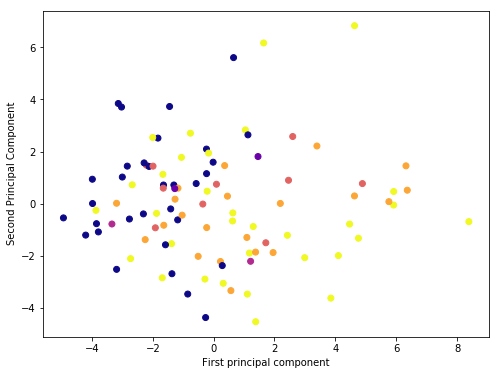

In [72]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],
            c=df['TVF Pitchers'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Second Principal Component')

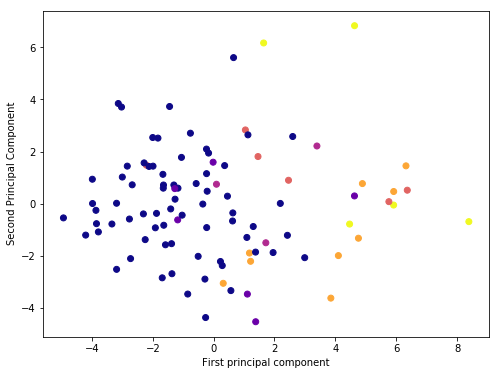

In [73]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],
            c=df['Bose dead/alive'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Second Principal Component')

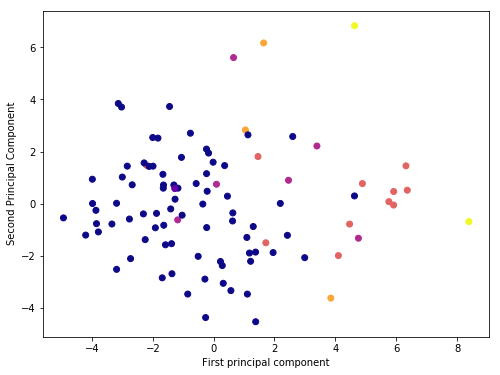

In [74]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],
            c=df['Rangbaaz'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Second Principal Component')

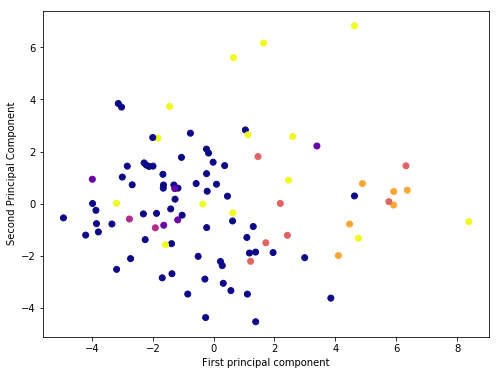

In [75]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],
            c=df['Malgudi days'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Second Principal Component')

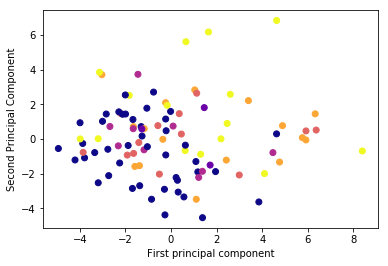

In [76]:
plt.scatter(x_pca[:,0],x_pca[:,1],
            c=df['Mahabharat'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Second Principal Component')

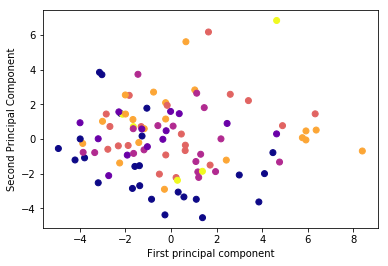

In [77]:
plt.scatter(x_pca[:,0],x_pca[:,1],
            c=df['Coffee with Karan'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Second Principal Component')

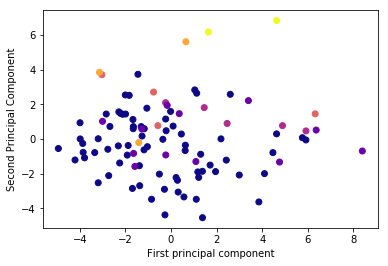

In [78]:
plt.scatter(x_pca[:,0],x_pca[:,1],
            c=df['Yeh Rishta Kya Kehlata Hai'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Second Principal Component')

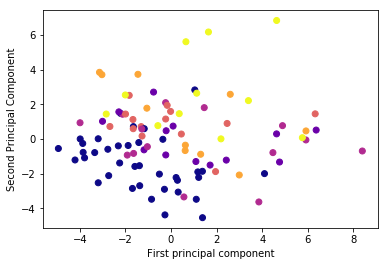

In [79]:
plt.scatter(x_pca[:,0],x_pca[:,1],
            c=df['Taarak Mehta Ka Ooltah Chashmah'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

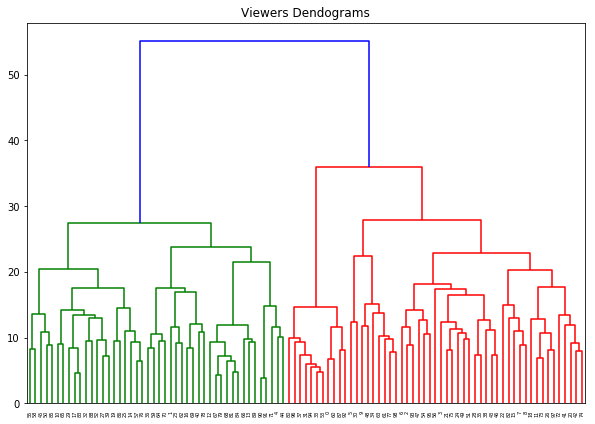

In [81]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Viewers Dendograms")  
dend = shc.dendrogram(shc.linkage(df, method='ward')) 

In [82]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df)

array([2, 0, 1, 1, 0, 3, 1, 1, 1, 3, 4, 1, 0, 0, 4, 1, 0, 4, 1, 4, 1, 1,
       1, 0, 1, 4, 1, 4, 1, 4, 3, 2, 4, 2, 3, 1, 0, 2, 1, 4, 0, 1, 1, 1,
       0, 4, 1, 1, 3, 1, 4, 1, 4, 2, 1, 4, 1, 4, 4, 0, 2, 3, 0, 3, 0, 4,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 4, 3, 0, 0, 2, 0, 1, 4, 0, 4, 4, 2,
       4, 0, 0, 0, 2, 1, 2, 1, 2, 1, 3], dtype=int64)